# Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

### Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

### DUDAS GENERADA DURANTE ESTE EJERCICIO: 
- ¿Cuando se recomienda transformar los datos? (La transformación puede cambiar las correlaciones originales entre las variables..). 
- ¿Es recomendable aplicar transformaciones diferentes según la columna? (Por ejemplo, columna con 0 y 1 - es necesario transformarla? Columnas con distribuciones muy distintas entre sí, usamos una transformación más general para aplicar la misma a todas?


## Ejercicio 1

En un primer lugar, cargaremos los datos

In [1]:
import pandas as pd

house = pd.read_csv('housing_data.csv', header=None)

house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


No me convence sin cabezal, ya que es muy lioso a la hora de analizar. Con la información contenida en el fichero de housing data description, añado títulos a cada columna

In [2]:
house = pd.read_csv("housing_data.csv",  
                  names=["CRIM", "ZN", "INDUS", "RIVER", "NOX","RM", "PRIOR40s","DIS", "RAD", "TAX","PTRATIO","BLA","LSTAT","MEDV"])

house.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
house.info() #Tenemos 506 registros con 14 columnas, todas numéricas. No hay ningún NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   RIVER     506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   PRIOR40s  506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATIO   506 non-null    float64
 11  BLA       506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(house, test_size=0.2) #Dividimos los datos en dos datasets: train y test. 

#Indico el porcentaje en test_size. Usaré un 80% de los datos como train (para entrenar modelo) y un 20% como test (testeo modelo)

Ahora vamos a comprobar cómo son cada uno de los dos datasets que acabamos de crear. Empezaremos por el train

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 314 to 4
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      404 non-null    float64
 1   ZN        404 non-null    float64
 2   INDUS     404 non-null    float64
 3   RIVER     404 non-null    int64  
 4   NOX       404 non-null    float64
 5   RM        404 non-null    float64
 6   PRIOR40s  404 non-null    float64
 7   DIS       404 non-null    float64
 8   RAD       404 non-null    int64  
 9   TAX       404 non-null    float64
 10  PTRATIO   404 non-null    float64
 11  BLA       404 non-null    float64
 12  LSTAT     404 non-null    float64
 13  MEDV      404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


Observamos que efectivamente contiene un 80% de los datos originales (404 registros). Vamos a ver el aspecto de los datos:

In [6]:
train.describe()

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.644410,11.021040,11.122698,0.074257,0.554978,6.290936,68.657178,3.754100,9.465347,406.898515,18.410396,355.458292,12.595891,22.707921
std,8.905083,22.462352,6.831708,0.262514,0.116223,0.718487,27.978183,2.088019,8.631197,166.267616,2.165965,91.719655,7.220794,9.370829
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083545,0.000000,5.190000,0.000000,0.449000,5.884750,45.775000,2.087875,4.000000,279.000000,17.400000,375.085000,6.915000,17.075000
50%,0.252775,0.000000,9.690000,0.000000,0.538000,6.217500,76.800000,3.142300,5.000000,334.000000,18.850000,391.385000,11.110000,21.400000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.618250,94.325000,5.141475,24.000000,666.000000,20.200000,396.250000,16.727500,25.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Obtenemos estadísticos de interés, entre los que se incluyen las medias, la desviación estándar, los valores máximos... Esto deberá ser similar al del dataset test. Abajo grafico las correlaciones existentes entre todas las columnas

<AxesSubplot:>

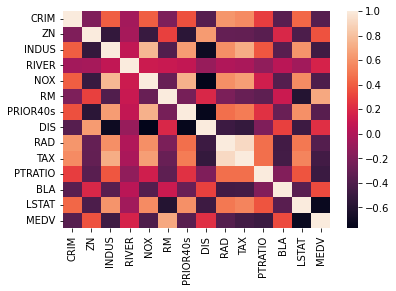

In [7]:
import seaborn as sns

train_corr = train.corr()
sns.heatmap(train_corr)

Y ahora veamos qué tenemos en el conjunto de test:

<AxesSubplot:>

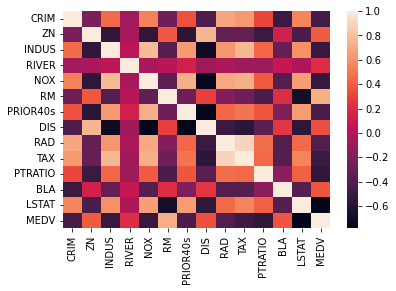

In [8]:
test_corr = test.corr()
sns.heatmap(test_corr)

In [9]:
test.describe()

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.491188,12.720588,11.192549,0.049020,0.553575,6.259676,68.24902,3.957208,9.882353,413.539216,18.634314,361.489314,12.879510,21.839216
std,7.314170,26.535291,7.006530,0.216975,0.115063,0.638577,28.95329,2.177312,9.038196,177.995142,2.162255,89.876274,6.845854,8.482027
min,0.013110,0.000000,0.740000,0.000000,0.392000,4.519000,6.60000,1.316300,1.000000,187.000000,12.600000,3.500000,3.560000,7.000000
25%,0.066630,0.000000,5.145000,0.000000,0.448500,5.899750,39.07500,2.310425,4.000000,281.000000,17.075000,376.122500,7.400000,16.725000
50%,0.279490,0.000000,9.795000,0.000000,0.538000,6.152500,78.50000,3.369200,5.000000,322.000000,19.400000,391.640000,12.650000,20.600000
75%,3.988017,0.000000,18.100000,0.000000,0.643000,6.645500,93.37500,5.212700,24.000000,666.000000,20.200000,396.027500,17.105000,24.925000
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.266000,100.00000,12.126500,24.000000,711.000000,21.200000,396.900000,36.980000,50.000000


A simple vista se observan diferencias en los valores de la tabla, aunque éstas no resultan exageradas. El patrón de correlaciones dentro de cada dataset parece mantenerse intacto. Por último, vamos a ver qué pinta tienen las distribuciones de las distintas variables:

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig.gca()
train.hist(ax=ax) #Plotea un histograma para cada variable. Con este script la figura sale bastante grande y bien visible

C:\Users\rakel\AppData\Local\Temp\ipykernel_4280\165032907.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train.hist(ax=ax)


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'RIVER'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'PRIOR40s'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BLA'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

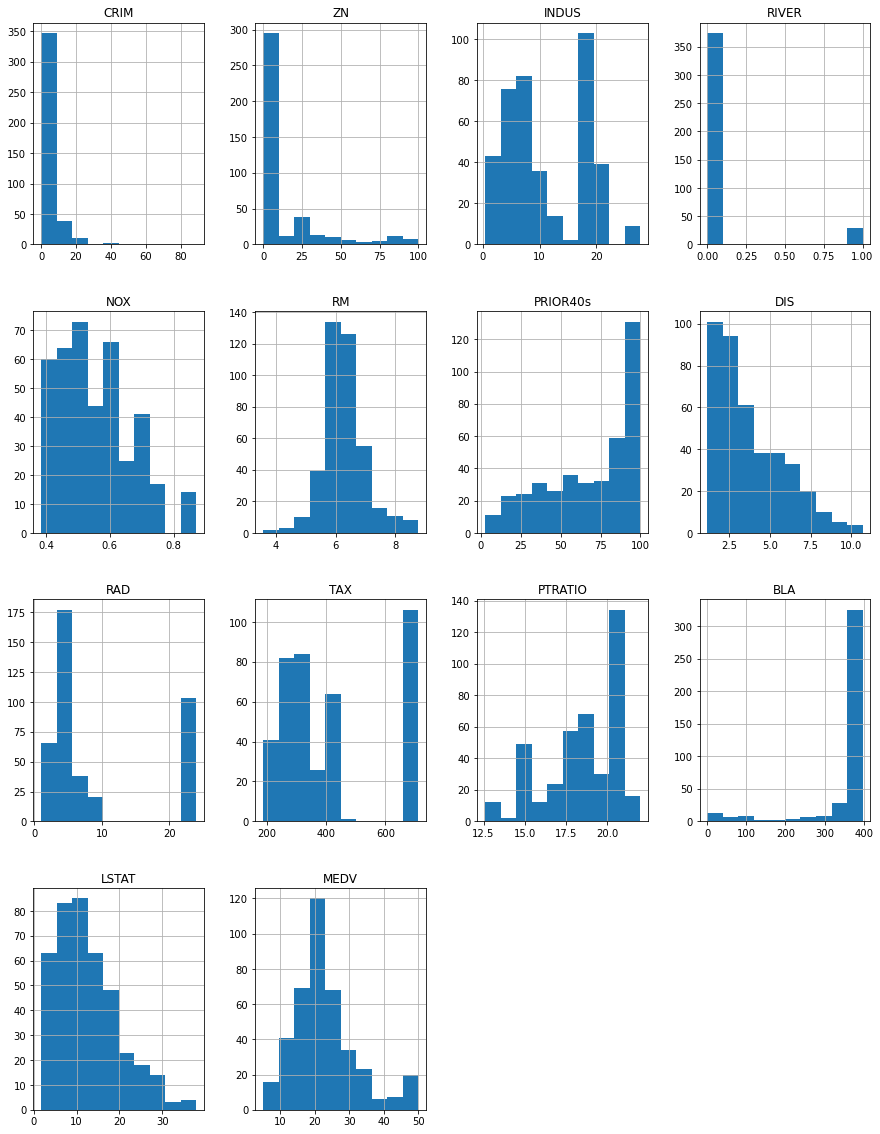

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig.gca()
train.hist(ax=ax)

C:\Users\rakel\AppData\Local\Temp\ipykernel_4280\4221531996.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  test.hist(ax=ax) #Lo mismo para el conjunto de Test


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'RIVER'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'PRIOR40s'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BLA'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

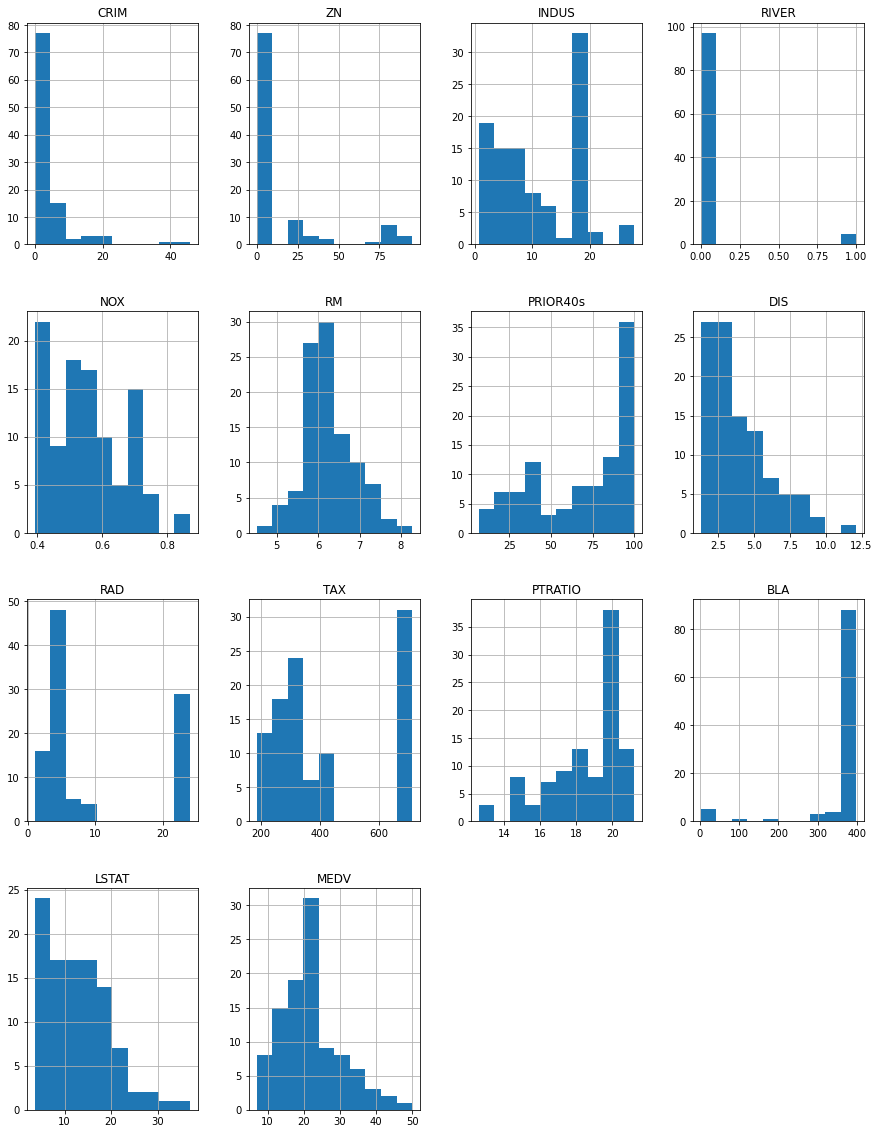

In [11]:
fig2 = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig2.gca()
test.hist(ax=ax) #Lo mismo para el conjunto de Test

Observamos nuevammente pequeñas variaciones, pero las distribuciones son bastante similares entre ambos datasets!

# Ejercicio 2 y 3

En este ejercicio, realizaré un preprocesado de los datos y visualizaré los resultados obtenidos. Además, también practicaré la creación de variables DUMMY siguiendo varias metodologías

In [60]:
# conda update conda
!pip install scikit-learn scipy matplotlib
#Lo he usado porque tenía problemas para importar el preprocessing de sklearn... 
#También he actualizado conda desde la terminal conda con: conda update conda.
#Y he seguido esta web. https://scikit-learn.org/stable/developers/advanced_installation.html
#Algo ha funcionado así que lo pongo todo

C:\Users\rakel\AppData\Local\Temp\ipykernel_4280\1114919070.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train_trans.hist(ax=ax) #Lo mismo para el conjunto de Test


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

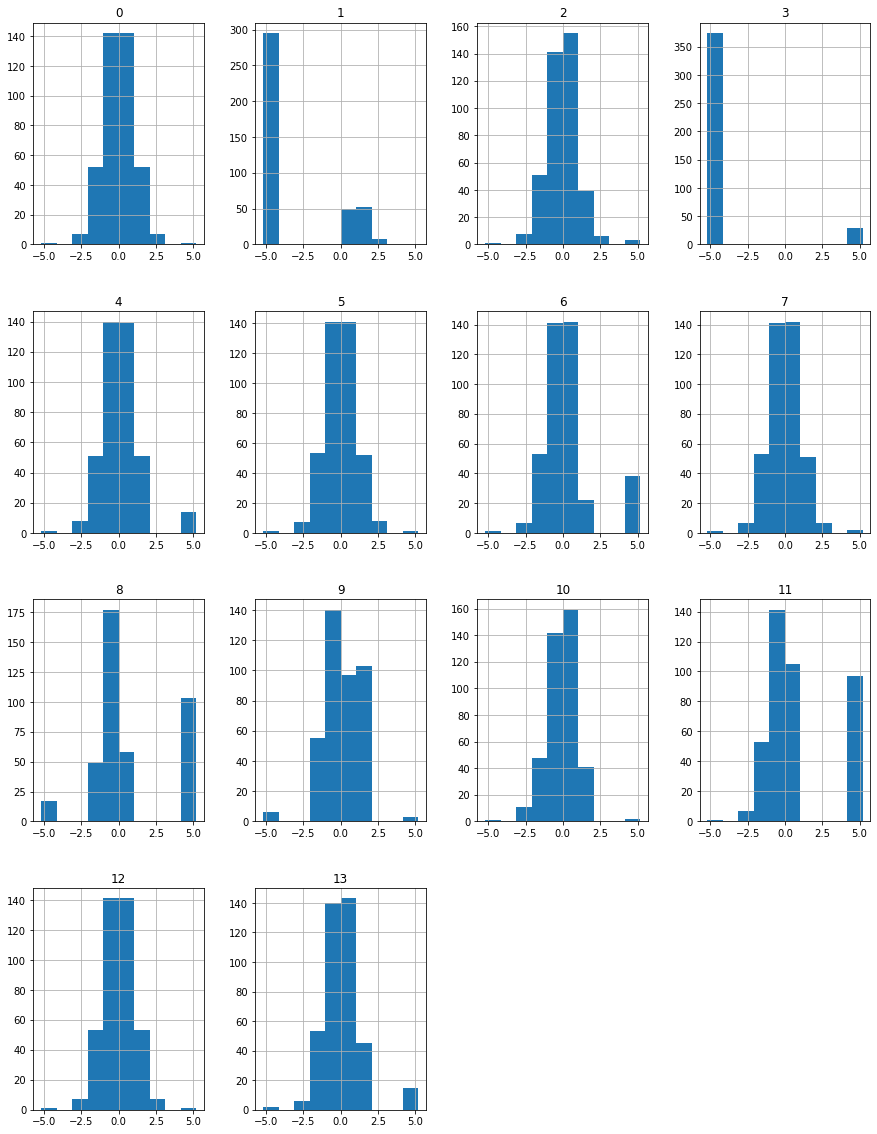

In [34]:
import numpy as np
from sklearn import preprocessing

quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=400,output_distribution='normal') #fijo un número de 
#cuantiles menor al número de registros, y establezco el output que deseo (normal)

train_trans = quantile_transformer.fit_transform(train) #Aplico la transformación con los parámetros anteriores
df_train_trans = pd.DataFrame(train_trans) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe


fig3 = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig3.gca()
df_train_trans.hist(ax=ax) #Lo mismo para el conjunto de Test

He elegido una transformación no lineal ya que las distribuciones originales diferían mucho de la normalidad (algunas variables mostraban distribuciones claramente no gaussianas).

En concreto, la transformación por quantiles es menos sensible a los outliers. No obstante, puede distorsionar las correlaciones y distancias que existen entre las variables.

Por último, indicar que he realizado la transformación a ammbos datasets por separado. **¿Por qué?** Porque en la vida real, cuando obtienes un nuevo dataset en el cual aplicarás el modelo ya calibrado, esta normalización o estandarización se realizará de manera independiente al dataset original. Por tanto, de este modo nos acercamos al máximo a lo que sería la vida real

C:\Users\rakel\AppData\Local\Temp\ipykernel_4280\285517503.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_test_trans.hist(ax=ax) #Lo mismo para el conjunto de Test


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

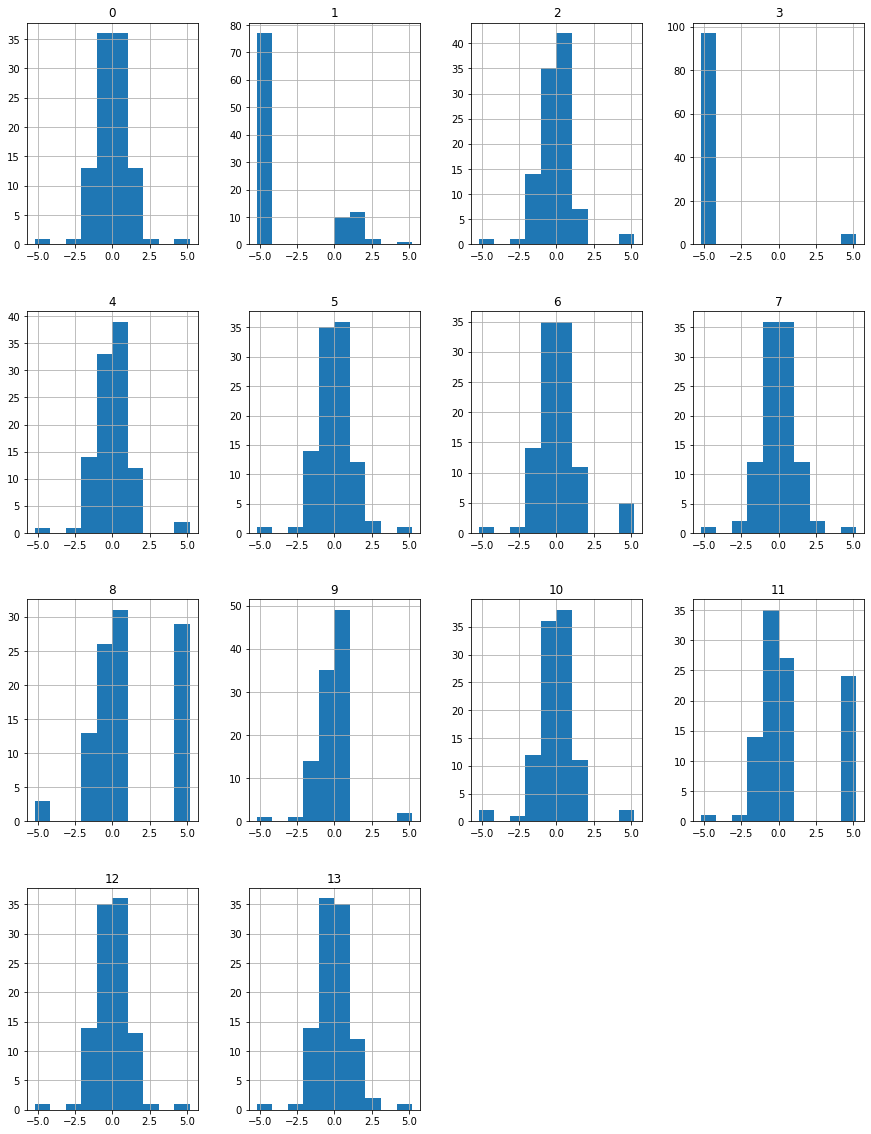

In [35]:
quantile_transformer2 = preprocessing.QuantileTransformer(n_quantiles=100,output_distribution='normal') #fijo un número de 
#cuantiles menor al número de registros, y establezco el output que deseo (normal)

test_trans = quantile_transformer2.fit_transform(test) #Aplico la transformación con los parámetros anteriores
df_test_trans = pd.DataFrame(test_trans) #El output es en numpy, vuelvo de nuevo a transformarlo a dataframe


fig3 = plt.figure(figsize = (15,20)) #Tamaño figura
ax = fig3.gca()
df_test_trans.hist(ax=ax) #Lo mismo para el conjunto de Test

<AxesSubplot:>

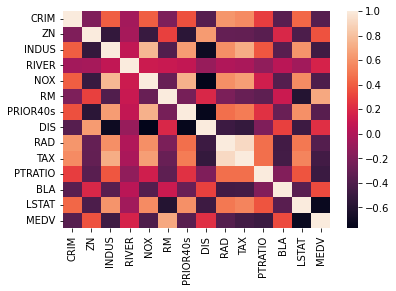

In [36]:
#Voy a comparar los resultados de las correlaciones que habíamos obtenido anteriormente con el dataset transformado:

#Anteriormente, para el dataset train:
train_corr = train.corr()
sns.heatmap(train_corr)

<AxesSubplot:>

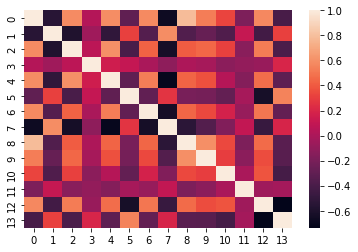

In [37]:
#Ahora mismo, para el dataset train transformado:

traintrans_corr=df_train_trans.corr()
sns.heatmap(traintrans_corr)

Aunque en general los patrones sí que se mantienen, observamos algunos cambios substanciales. En general, parece que la mayoría de correlaciones reducen (colores más anaranjados, cercanos al 0). Si queremos verlo de manera numérica, podemos obtener los datos de ambos datasets y compararlos:

In [38]:
df_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.000091,-3.457726,0.006124,-4.427159,0.096560,-0.000342,0.313900,0.006540,0.877816,-0.045006,0.000912,0.929579,0.000097,0.099126
std,1.052285,2.886513,1.087482,2.729803,1.347336,1.053487,1.786258,1.076397,2.756241,1.165921,1.052704,2.497260,1.053262,1.386017
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.674482,-5.199338,-0.668586,-5.199338,-0.676463,-0.674465,-0.674479,-0.674393,-0.622163,-0.676463,-0.629805,-0.674503,-0.674479,-0.674464
50%,0.000019,-5.199338,0.012565,-5.199338,0.034559,0.000000,-0.000062,-0.000008,-0.034559,0.001885,0.001571,-0.000012,0.000022,0.003141
75%,0.674475,0.652956,0.688357,-5.199338,0.656849,0.674437,0.674479,0.674493,5.199338,1.113103,0.712443,0.674490,0.674490,0.665653
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [39]:
train.describe()

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.644410,11.021040,11.122698,0.074257,0.554978,6.290936,68.657178,3.754100,9.465347,406.898515,18.410396,355.458292,12.595891,22.707921
std,8.905083,22.462352,6.831708,0.262514,0.116223,0.718487,27.978183,2.088019,8.631197,166.267616,2.165965,91.719655,7.220794,9.370829
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083545,0.000000,5.190000,0.000000,0.449000,5.884750,45.775000,2.087875,4.000000,279.000000,17.400000,375.085000,6.915000,17.075000
50%,0.252775,0.000000,9.690000,0.000000,0.538000,6.217500,76.800000,3.142300,5.000000,334.000000,18.850000,391.385000,11.110000,21.400000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.618250,94.325000,5.141475,24.000000,666.000000,20.200000,396.250000,16.727500,25.025000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Por último, para practicar con las variables dummy. En primer lugar voy a crear una columnaa al final del dataset train (antes del procesado) que contenga una nueva variable dummy. En concreto, me centraré en la columna "Lower Stat" (LSTAT). Si el porcentaje es menor a 12.5 (mean) = Low income; si es superior = Higher income 

In [40]:
train_copy = train.copy() #Hago una copia para no liarla
train_copy['LSTAT_DUMMY'] = (train_copy['LSTAT'] > 12.5).astype(int)
train_copy

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV,LSTAT_DUMMY
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304.0,18.4,395.69,9.28,23.8,0
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666.0,20.2,370.22,23.34,11.9,1
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,0
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16,14.0,1
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193.0,17.8,396.90,5.68,32.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9,1
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9,0
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666.0,20.2,393.07,7.74,23.7,0


Ahora, voy a usar la función get_dummies para hacer dos columnas nuevas en base a esta columna: Si es low income (0) o higher income (1)

In [41]:
train_copy=pd.concat([train_copy, pd.get_dummies(train_copy['LSTAT_DUMMY'])], axis=1); train_copy

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV,LSTAT_DUMMY,0,1
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304.0,18.4,395.69,9.28,23.8,0,1,0
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666.0,20.2,370.22,23.34,11.9,1,0,1
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,0,1,0
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16,14.0,1,0,1
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193.0,17.8,396.90,5.68,32.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0,0,1,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9,1,0,1
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9,0,1,0
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666.0,20.2,393.07,7.74,23.7,0,1,0


In [59]:
#print(train_copy.iloc[:, [16]]) - recurso para localizaciones de columnas

#Cambio el nombre de las columnas para hacerlo más entendible

train_copy.rename(columns={ train_copy.columns[15]: "Lower_income",  train_copy.columns[16]: "Higher_income"}, inplace = True)
train_copy

,CRIM,ZN,INDUS,RIVER,NOX,RM,PRIOR40s,DIS,RAD,TAX,PTRATIO,BLA,LSTAT,MEDV,LSTAT_DUMMY,Lower_income,Higher_income
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304.0,18.4,395.69,9.28,23.8,0,1,0
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666.0,20.2,370.22,23.34,11.9,1,0,1
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,396.90,5.98,22.1,0,1,0
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16,14.0,1,0,1
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193.0,17.8,396.90,5.68,32.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0,0,1,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9,1,0,1
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,23.9,0,1,0
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666.0,20.2,393.07,7.74,23.7,0,1,0
